In [13]:
from pathlib import Path
import rsa
import utils

conf_strategy = 'simple'
atlas_name = 'msdl'
network_name = None
n_components = 5
threshold = 95
low_pass = 0.08
high_pass = 0.01
smoothing_fwhm = 6.
t_r = 2.
data_path = Path('neurocovid_derivatives')
clinical_file = 'clinical_data.csv'
subjects = [sub for sub in data_path.glob('sub-*') if sub.is_dir()]

In [14]:
subjects_df = utils.load_clinical_data(clinical_file)
utils.load_datapaths(subjects, subjects_df)

atlas = utils.load_atlas(atlas_name)
if network_name:
    atlas = utils.extract_network(atlas, network_name)

In [11]:
rdm_beh, rdm_conn = rsa.rsa(subjects_df, conf_strategy, n_components, atlas, low_pass, high_pass, smoothing_fwhm, t_r, 'output')

/home/ftravi/.local/lib/python3.10/site-packages/sklearn/decomposition/_dict_learning.py:732: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.3. Use 'max_iter' instead.
  warnings.warn(msg, FutureWarning)


Extracted 18 regions


/home/ftravi/.local/lib/python3.10/site-packages/joblib/memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
/home/ftravi/.local/lib/python3.10/site-packages/joblib/memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
/home/ftravi/.local/lib/python3.10/sit

Cluster 1
[5, 37, 31, 36, 34, 30, 11, 24, 15, 33, 27, 4, 9, 20, 40, 32, 10, 6, 12, 23, 42, 13, 22, 7, 3, 21, 14, 18, 19, 43, 38, 44]
Cluster 2
[35, 26, 41, 1, 8, 28]


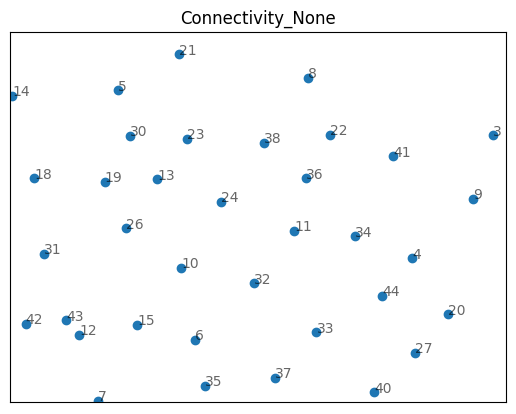

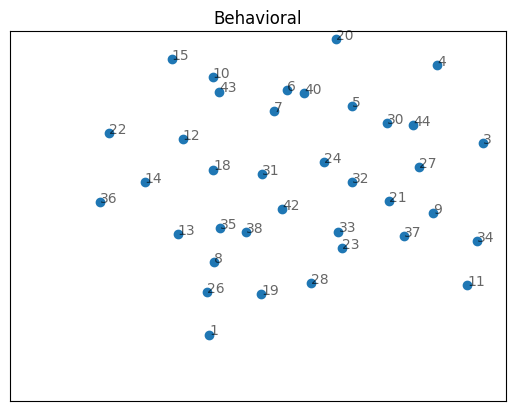

In [12]:
from rsatoolbox import vis
import matplotlib.pyplot as plt

fig1 = vis.scatter_plot.show_2d(rdm_conn, method='MDS', rdm_descriptor='name', pattern_descriptor='subjects')
fig2 = vis.scatter_plot.show_2d(rdm_beh, method='MDS', rdm_descriptor='name', pattern_descriptor='subjects')
# Print the subjects IDs of each cluster
print('Cluster 1')
print(subjects_df[subjects_df['cluster'] == 1].index.to_list())
print('Cluster 2')
print(subjects_df[subjects_df['cluster'] == 2].index.to_list())
plt.show()